In [1]:
import pandas as pd
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

In [2]:
df2 = pd.read_csv("C:/Users/Gianluca/OneDrive/Documenti/University/3 "
                  "II/Project_Y3/Raw Files/merged_features_IC50_g12d"
                  ".csv")
df2

,ChEMBL ID,Smiles,FC,N,H,Cl,Br,I,P,F,...,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,IC50 (nM)
0,1340697,Oc1cc(-c2nc3OC[C@@H]4[C@@H]5CC[C@H](CN4c4nc(OC...,0,348,33,0,0,0,0,2,...,0,0,1,0,0,0,0,0,0,0.200
1,1340710,Oc1cc(-c2nc3OC[C@@H]4[C@@H]5CC[C@H](CN4c4nc(OC...,0,362,35,0,0,0,0,2,...,0,0,1,0,0,0,0,0,0,0.200
2,1340721,Oc1cc(-c2nc3CC[C@@H]4[C@@H]5CC[C@H](CN4c4nc(OC...,0,440,35,0,0,0,0,11,...,0,0,1,0,0,0,0,0,0,0.200
3,1340735,C[Si]1(C)CCCN(CC2(COc3nc4N5C[C@H]6CC[C@H](N6)[...,0,368,44,0,0,0,0,2,...,0,0,1,0,0,0,0,0,0,0.200
4,1340738,C[C@H]1C[C@@H]2[C@@H]3CC[C@H](CN2c2nc(OC[C@@]4...,0,332,34,0,0,0,0,4,...,0,0,0,0,0,0,0,0,0,0.200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3519,1209825,Oc1cc(-c2ncc3c(nc(OC[C@@]45CCCN4C[C@H](F)C5)nc...,0,310,31,1,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0.200
3520,1340667,Oc1cc(-c2nc3OC[C@@H]4[C@@H]5CC[C@H](CN4c4nc(OC...,0,328,31,0,0,0,0,3,...,0,0,1,0,0,0,0,0,0,0.200
3521,1340691,Oc1cc(-c2nc3OC[C@@H]4[C@@H]5CC[C@H](CN4c4nc(OC...,0,336,30,0,0,0,0,4,...,0,0,1,0,0,0,0,0,0,0.200
3522,1340693,Oc1cc(-c2nc3OC[C@@H]4[C@@H]5CC[C@H](CN4c4nc(OC...,0,344,35,0,0,0,0,3,...,0,0,1,0,0,0,0,0,0,0.200


In [3]:
import numpy as np
import pandas as pd
def pIC50(input):
    pIC50 = []

    input["IC50 (nM)"] = pd.to_numeric(input["IC50 (nM)"],errors='coerce')

    for i in input["IC50 (nM)"]:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input["pIC50"]

    return x

In [4]:
filename = ("C:/Users/Gianluca/OneDrive/Documenti/University/3 "
                  "II/Project_Y3/Raw Files/merged_features_IC50_g12d"
                  ".csv")
#df = pd.read_csv("fda_original.csv",sep=";")
df2 = pd.read_csv(filename)
df2.dropna(subset=['IC50 (nM)'], inplace=True)
df2['IC50 (nM)'] = pIC50(df2)
df2['IC50 (nM)'] = df2['pIC50']  # Replace 'SV' column with pIC50 values

# Drop 'pIC50' column (optional) as it's now redundant
df2.drop(columns=['pIC50'], inplace=True)

df2

,ChEMBL ID,Smiles,FC,N,H,Cl,Br,I,P,F,...,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,IC50 (nM)
0,1340697,Oc1cc(-c2nc3OC[C@@H]4[C@@H]5CC[C@H](CN4c4nc(OC...,0,348,33,0,0,0,0,2,...,0,0,1,0,0,0,0,0,0,9.69897
1,1340710,Oc1cc(-c2nc3OC[C@@H]4[C@@H]5CC[C@H](CN4c4nc(OC...,0,362,35,0,0,0,0,2,...,0,0,1,0,0,0,0,0,0,9.69897
2,1340721,Oc1cc(-c2nc3CC[C@@H]4[C@@H]5CC[C@H](CN4c4nc(OC...,0,440,35,0,0,0,0,11,...,0,0,1,0,0,0,0,0,0,9.69897
3,1340735,C[Si]1(C)CCCN(CC2(COc3nc4N5C[C@H]6CC[C@H](N6)[...,0,368,44,0,0,0,0,2,...,0,0,1,0,0,0,0,0,0,9.69897
4,1340738,C[C@H]1C[C@@H]2[C@@H]3CC[C@H](CN2c2nc(OC[C@@]4...,0,332,34,0,0,0,0,4,...,0,0,0,0,0,0,0,0,0,9.69897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3519,1209825,Oc1cc(-c2ncc3c(nc(OC[C@@]45CCCN4C[C@H](F)C5)nc...,0,310,31,1,0,0,0,2,...,0,0,0,0,0,0,0,0,0,9.69897
3520,1340667,Oc1cc(-c2nc3OC[C@@H]4[C@@H]5CC[C@H](CN4c4nc(OC...,0,328,31,0,0,0,0,3,...,0,0,1,0,0,0,0,0,0,9.69897
3521,1340691,Oc1cc(-c2nc3OC[C@@H]4[C@@H]5CC[C@H](CN4c4nc(OC...,0,336,30,0,0,0,0,4,...,0,0,1,0,0,0,0,0,0,9.69897
3522,1340693,Oc1cc(-c2nc3OC[C@@H]4[C@@H]5CC[C@H](CN4c4nc(OC...,0,344,35,0,0,0,0,3,...,0,0,1,0,0,0,0,0,0,9.69897


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_regression

# Load training descriptors data
#df1 = df1.loc[:, ~df1.columns.str.contains('Unnamed')]
df2.dropna(subset=['IC50 (nM)'], inplace=True)
X = df2.drop(columns=['IC50 (nM)','Smiles', 'ChEMBL ID'])
y = df2['IC50 (nM)']

# Initialize model and pipeline
model = RandomForestRegressor(max_depth=20, min_samples_leaf=10)
pipe = Pipeline([('scaler', StandardScaler()), ('model', model)])

# Load new descriptors data
new_descriptors = (pd.read_csv
                   ('C:/Users/Gianluca/OneDrive/Documenti/University'
                    '/3 II/Project_Y3/Raw Files/FDA_Hyb_Features.csv'))
new_descriptors.dropna(inplace=True)

# Extract ChEMBL IDs and SMILES
chembl_id_column = new_descriptors['ChEMBL ID']
smiles_column = new_descriptors['Smiles']
new_descriptors.drop(columns=['ChEMBL ID', 'Smiles'], inplace=True)

# Ensure new_descriptors has the same columns as X
missing_cols = set(X.columns) - set(new_descriptors.columns)  # Columns missing in new data
extra_cols = set(new_descriptors.columns) - set(X.columns)  # Extra columns in new data

# Add missing columns with zero values
for col in missing_cols:
    new_descriptors[col] = 0

# Drop extra columns
new_descriptors = new_descriptors[X.columns]  # Reorder and drop extras

# Now X and new_descriptors have identical columns

# Initialize a DataFrame to store results
loop_results_df = pd.DataFrame(columns=['ChEMBL ID', 'Smiles', 'Predicted Value'])

# Number of iterations
loop_n = 50

# Dictionary to store predicted values for each ChEMBL ID
predicted_values = {chembl_id: [] for chembl_id in chembl_id_column.unique()}
feature_importances = []
perm_importances = []
# Run the loop to fit the model and predict the values
for i in range(loop_n):
    pipe.fit(X, y)

    # Get regular feature importance
    rf_model = pipe.named_steps['model']
    feature_importances.append(rf_model.feature_importances_)

    # Get permutation importance
    result = permutation_importance(pipe, X, y, n_repeats=10, random_state=42, n_jobs=-1)
    perm_importances.append(result.importances_mean)

    loop_predicted_values = pipe.predict(new_descriptors)

    loop_df = pd.DataFrame({
        'ChEMBL ID': chembl_id_column,
        'Smiles': smiles_column,
        'Predicted Value': loop_predicted_values
    })
    loop_df.sort_values(by='Predicted Value', ascending=False, inplace=True)

    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=FutureWarning)
        loop_results_df = pd.concat([loop_results_df, loop_df.head
        (30)])

    # Store the predicted values for each ChEMBL ID
    for chembl_id, predicted_value in zip(chembl_id_column, loop_predicted_values):
        if chembl_id in predicted_values:
            predicted_values[chembl_id].append(predicted_value)

# Average the importances across all iterations
avg_feature_importance = np.mean(feature_importances, axis=0)
avg_perm_importance = np.mean(perm_importances, axis=0)

# Create DataFrames for visualization
feature_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': avg_feature_importance
}).sort_values('Importance', ascending=False)

perm_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': avg_perm_importance
}).sort_values('Importance', ascending=False)



# Calculate frequency of each ChEMBL ID in the top 10
value_counts = loop_results_df['ChEMBL ID'].value_counts(normalize=True) * 10
#print(value_counts)

# Get the top 13 ChEMBL IDs
top_10_chembl_ids = value_counts.head(30).index

<Figure size 1200x800 with 0 Axes>

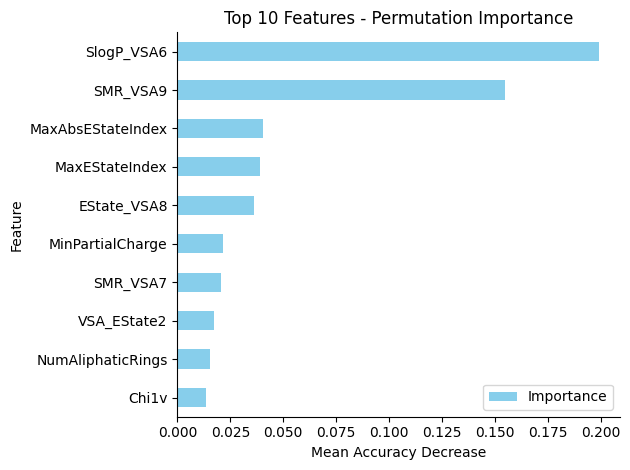

In [6]:
# Plot Permutation Importance
plt.figure(figsize=(12, 8))
perm_df.head(10).sort_values('Importance', ascending=True).plot.barh(
    x='Feature', y='Importance', color='skyblue'
)
plt.title('Top 10 Features - Permutation Importance')
plt.xlabel('Mean Accuracy Decrease')
plt.gca().spines[['right', 'top']].set_visible(False)
plt.tight_layout()
plt.savefig('permutation_feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

In [9]:
mean_values = {chembl_id: np.mean(predicted_values[chembl_id]) for chembl_id in top_10_chembl_ids}
std_dev_values = {chembl_id: np.std(predicted_values[chembl_id]) for chembl_id in top_10_chembl_ids}

summary_df = pd.DataFrame({
    'ChEMBL ID': top_10_chembl_ids,
    'Frequency': [value_counts[chembl_id] for chembl_id in top_10_chembl_ids],
    'Avg Predicted Value': [mean_values[chembl_id] for chembl_id in top_10_chembl_ids]
})

summary_df.head(30)
summary_df.to_csv("RF_molecules_Newfeatures_G12D_30.csv", index=False)